In [39]:
#%%
import logging

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from main import train, evaluate

logging.basicConfig(level=logging.DEBUG)
logger = logging.getLogger(__name__)

plt.rcParams['figure.figsize'] = [20, 20]

## Overview

1. Baseline: A naive bayes model is used as baseline.
2. Experiment
    1. Text preprocessing
        1. Common word contractions are expanded. E.g. "aren't" -> "are not".
        2. Some words are normalized. E.g. "mother's" -> "mother".
        3. Numbers are replaced with "NUM".
        4. Alpha-numeric words are replaced with a special token. E.g. "19th".
        5. OOV words in test are replaced with "UNK".
        6. Sequences are padded/head truncated to have a same length.
    2. Word embedding
        1. Context-free embedding **GloVe** is used.
        2. OOV words are embedding with the same random vector.
    3. Model
        1. Inputs are a fix-length sequence of 100-d vectors.
        2. 1 **LSTM** + 2 fully connected layers.
    4. Metrics
        1. Accuracy is used as the main evaluation metric as imbalancement is not severe.
            1. Coarse-grained: **92% vs 76% (baseline)**
            2. Fine-grained: **83% vs 53% (baseline)**
        2. Detail analysis such as P/R per class, confusion matrix future plans are briefly analyzed.
3. Code structure
    ```
    ./
    │   README.md
    │   present.ipynb
    │   requrements.txt
    │   setup.sh
    │   main.py
    └───config/
    │   │   config.py
    └───data/
    │   │   train_5500.label.txt
    │   │   test_TREC_10.label.txt
    └───model/
    │   │   nb.py
    │   │   embedding_lstm.py
    └───src/
    │   │   data.py
    │   │   word_embedding.py
    ```
4. Examples
    ```
    python main.py train --train_data_path=<path_to_train_txt> --eval_data_path=<path_to_test_txt> --save_to=<path_to_model_output>
    
    python main.py evaluate --eval_data_path=<path_to_test_txt> \
    --model_path_coarse=<path_to_coarse_model> \
    --model_path_coarse=<path_to_finegrained_model> \
    --model_path_coarse=<path_to_coarse_baseline_model> \
    --model_path_coarse=<path_to_finegrained_baseline_model>
    ```

### Train

In [3]:
train('data/train_5500.label.txt',
      'data/test_TREC_10.label.txt',
      'model.pkl')

INFO:root:199 words not found : {'auerstadt', 'circumorbital', 'mixable', 'vbp', 'characterstics', 'doegs', 'palmiped', 'hepcats', 'basophobic', 'freidreich', 'shelleen', 'winkerbean', 'inoco', 'tetrinet', 'psorisis', 'indiglo', 'shoplifts', 'rednitz', 'emmigrate', 'bicornate', 'dipsomaniac', 'baseemen', 'theotokopoulos', 'cabarnet', 'deveopment', 'garmat', 'hiemal', 'lapwarmers', 'knowpost', 'janurary', 'tempelhol', 'superbowls', 'gymnophobia', 'cartoondom', 'seriphos', 'steakburgers', 'carefreeness', 'breony', 'cassidey', 'burnford', 'vlaja', 'lavoir', 'splatterpunk', 'hydrosulfite', 'bergeres', 'herculoids', 'hendecasyllabic', 'respones', 'nonchlorine', 'cotrubas', 'vermicilli', 'zoonose', 'clienttok', 'slotbacks', 'hebephrenia', 'cullion', 'mandibulofacial', 'haversian', 'seccession', 'frickett', 'ninjitsu', 'dextropropoxyphen', 'tadeus', 'recetrack', 'svhs', 'jogis', 'nicois', 'napsylate', 'pandoro', 'pregnacy', 'eidologist', 'dungri', 'tastebud', 'vdrl', 'flintknapping', 'diphall

Epoch 1/20
 - 96s - loss: 1.0489 - acc: 0.5994
Epoch 2/20
 - 93s - loss: 0.4760 - acc: 0.8252
Epoch 3/20
 - 93s - loss: 0.2523 - acc: 0.9178
Epoch 4/20
 - 93s - loss: 0.1312 - acc: 0.9585
Epoch 5/20
 - 93s - loss: 0.0691 - acc: 0.9782
Epoch 6/20
 - 92s - loss: 0.0337 - acc: 0.9894
Epoch 7/20
 - 93s - loss: 0.0204 - acc: 0.9938
Epoch 8/20
 - 93s - loss: 0.0105 - acc: 0.9969
Epoch 9/20
 - 93s - loss: 0.0188 - acc: 0.9943
Epoch 10/20
 - 92s - loss: 0.0073 - acc: 0.9985
Epoch 11/20
 - 91s - loss: 0.0070 - acc: 0.9989
Epoch 12/20
 - 91s - loss: 0.0263 - acc: 0.9919
Epoch 13/20
 - 91s - loss: 0.0371 - acc: 0.9912
Epoch 14/20
 - 91s - loss: 0.0022 - acc: 0.9994
Epoch 15/20
 - 92s - loss: 0.0017 - acc: 0.9993
Epoch 16/20
 - 91s - loss: 0.0017 - acc: 0.9996
Epoch 17/20
 - 91s - loss: 6.3188e-05 - acc: 1.0000
Epoch 18/20
 - 104s - loss: 4.9855e-05 - acc: 1.0000
Epoch 19/20
 - 99s - loss: 3.6677e-05 - acc: 1.0000
Epoch 20/20
 - 91s - loss: 3.1009e-05 - acc: 1.0000


INFO:main:Accuracy is 0.92
INFO:main:Model saved to model_coarse.pkl
INFO:root:199 words not found : {'auerstadt', 'circumorbital', 'mixable', 'vbp', 'characterstics', 'doegs', 'palmiped', 'hepcats', 'basophobic', 'freidreich', 'shelleen', 'winkerbean', 'inoco', 'tetrinet', 'psorisis', 'indiglo', 'shoplifts', 'rednitz', 'emmigrate', 'bicornate', 'dipsomaniac', 'baseemen', 'theotokopoulos', 'cabarnet', 'deveopment', 'garmat', 'hiemal', 'lapwarmers', 'knowpost', 'janurary', 'tempelhol', 'superbowls', 'gymnophobia', 'cartoondom', 'seriphos', 'steakburgers', 'carefreeness', 'breony', 'cassidey', 'burnford', 'vlaja', 'lavoir', 'splatterpunk', 'hydrosulfite', 'bergeres', 'herculoids', 'hendecasyllabic', 'respones', 'nonchlorine', 'cotrubas', 'vermicilli', 'zoonose', 'clienttok', 'slotbacks', 'hebephrenia', 'cullion', 'mandibulofacial', 'haversian', 'seccession', 'frickett', 'ninjitsu', 'dextropropoxyphen', 'tadeus', 'recetrack', 'svhs', 'jogis', 'nicois', 'napsylate', 'pandoro', 'pregnacy', 

Epoch 1/20
 - 93s - loss: 2.6336 - acc: 0.3355
Epoch 2/20
 - 91s - loss: 1.2960 - acc: 0.6458
Epoch 3/20
 - 91s - loss: 0.7467 - acc: 0.7821
Epoch 4/20
 - 91s - loss: 0.4280 - acc: 0.8678
Epoch 5/20
 - 91s - loss: 0.2401 - acc: 0.9281
Epoch 6/20
 - 91s - loss: 0.1140 - acc: 0.9661
Epoch 7/20
 - 91s - loss: 0.0621 - acc: 0.9828
Epoch 8/20
 - 95s - loss: 0.0420 - acc: 0.9879
Epoch 9/20
 - 91s - loss: 0.0366 - acc: 0.9919
Epoch 10/20
 - 91s - loss: 0.0175 - acc: 0.9949
Epoch 11/20
 - 91s - loss: 0.0150 - acc: 0.9954
Epoch 12/20
 - 91s - loss: 0.0071 - acc: 0.9983
Epoch 13/20
 - 91s - loss: 0.0029 - acc: 0.9994
Epoch 14/20
 - 91s - loss: 0.0030 - acc: 0.9989
Epoch 15/20
 - 92s - loss: 0.0033 - acc: 0.9991
Epoch 16/20
 - 92s - loss: 0.0017 - acc: 0.9993
Epoch 17/20
 - 93s - loss: 0.0018 - acc: 0.9994
Epoch 18/20
 - 93s - loss: 0.0016 - acc: 0.9993
Epoch 19/20
 - 93s - loss: 9.7518e-04 - acc: 0.9996
Epoch 20/20
 - 93s - loss: 0.0012 - acc: 0.9994


INFO:main:Accuracy is 0.83
INFO:main:Model saved to model_finegr.pkl
INFO:main:Accuracy is 0.76
INFO:main:Model saved to model_baseline_coarse.pkl
INFO:main:Accuracy is 0.53
INFO:main:Model saved to model_baseline_finegr.pkl


### Eval

In [4]:
cm_c, cm_f = evaluate('data/test_TREC_10.label.txt',
                      'model_coarse.pkl',
                      'model_finegr.pkl',
                      'model_baseline_coarse.pkl',
                      'model_baseline_finegr.pkl')

INFO:main:Coarse-grained accuracy 0.92% (vs 0.76% baseline)
INFO:main:Fine-grained accuracy 0.83% (vs 0.53% baseline)


### Result analysis

In [32]:
def analyze(cm):
    result_df = pd.DataFrame(cm.cm, columns=cm.labels, index=cm.labels)
    precisions, recalls = [],[]
    for idx, row in enumerate(result_df.iterrows()):
        recalls.append(round(row[1].iloc[idx]*1.0/row[1].sum(), 2))

    for idx, row in enumerate(result_df.T.iterrows()):
        precisions.append(round(row[1].iloc[idx]*1.0/row[1].sum(), 2))
    
    result_df['Precision'] = precisions
    result_df['Recall'] = recalls
    
    return result_df

In [33]:
analyze(cm_c)

,ABBR,DESC,ENTY,HUM,LOC,NUM,Precision,Recall
ABBR,7,2,0,0,0,0,0.70,0.78
DESC,2,136,0,0,0,0,0.87,0.99
ENTY,0,9,75,5,3,2,0.95,0.80
HUM,0,1,1,62,1,0,0.93,0.95
LOC,0,2,3,0,76,0,0.93,0.94
NUM,1,6,0,0,2,104,0.98,0.92


In [ ]:
analyze(cm_f)

DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


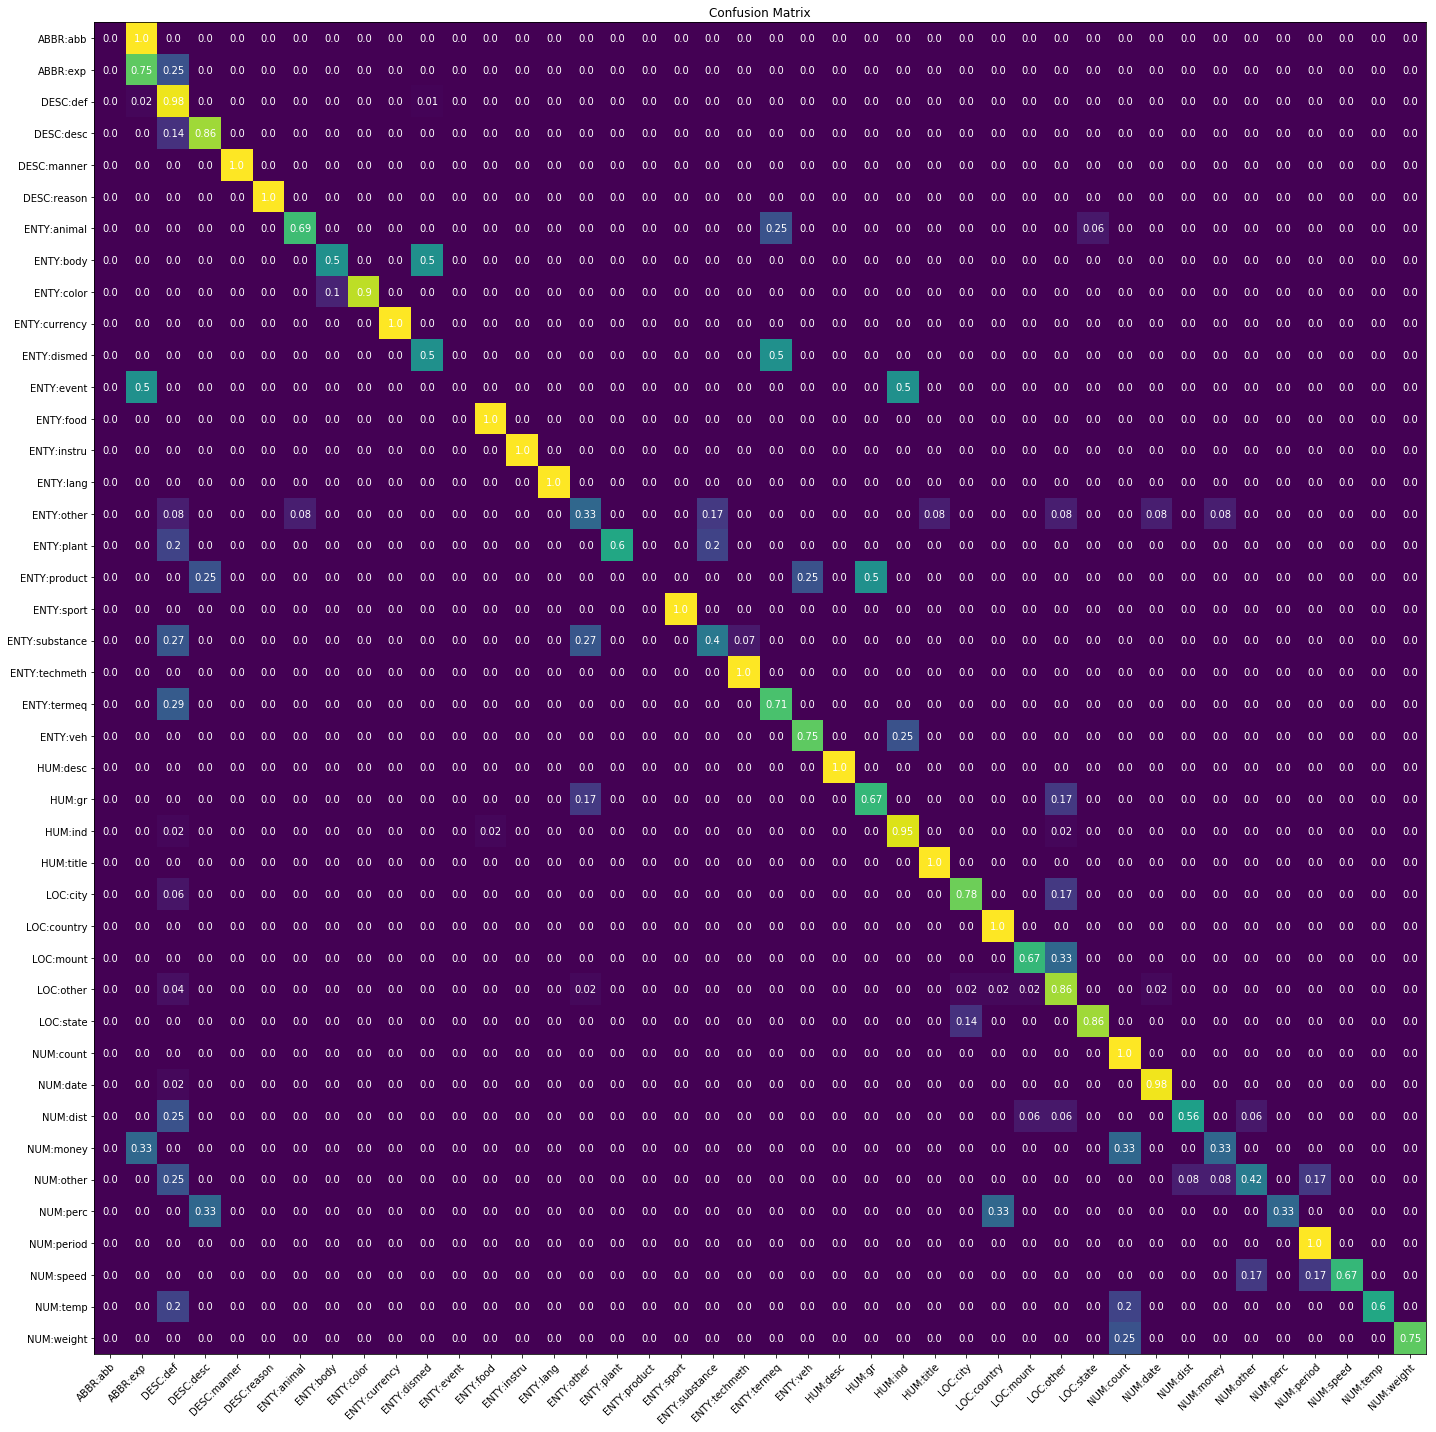

In [43]:
normalized_cm = cm_f.cm / np.sum(cm_f.cm, axis=1).reshape(-1,1)

fig, ax = plt.subplots()
im = ax.imshow(normalized_cm)

# We want to show all ticks...
ax.set_xticks(np.arange(cm_f.cm.shape[0]))
ax.set_yticks(np.arange(cm_f.cm.shape[0]))
# ... and label them with the respective list entries
ax.set_xticklabels(cm_f.labels)
ax.set_yticklabels(cm_f.labels)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(normalized_cm.shape[0]):
    for j in range(normalized_cm.shape[0]):
        text = ax.text(j, i, round(normalized_cm[i, j], 2),
                       ha="center", va="center", color="w")

ax.set_title("Confusion Matrix")
fig.tight_layout()
plt.show()

Some confusions on fine-grained level,
1. all ABBR:abb predicted as ABBR:exp
2. all ENTY:event predicted as HUM:ind or ABBR:exp
3. all ENTY:product predicted as other stuff
4. most NUM:money predicted as NUM:count or ABBR:exp

Look closer at the training counts,
1. ABBR:abb - 16 (0.2%)
2. ENTY:event - 56 (1.0%) vs HUM:ind - 962 (17.6%)
3. ENTY:product - 42 (0.7%)
4. NUM:money - 71 (1.3%) vs NUM:count - 363 (6.7%)

It seems that the training count for these are too low. The best way to increase performance on these is to add more traning data, via either real samples or synthetic ones. Also, given the same dataset, we can probably try to combine the two level of labels so an ENTY is less likely to be predicted as HUM or ABBR.

### Improvements
1. More training data
    1. real data
    2. synthetic data
2. A hierarchical classification
    1. Train together: use an output from shallower layer for coarse. Loss function as a weighted sum of loss function of 2 levels. During the early stage of training, more weights on coarse loss. Gradually increase the weight of fine loss
    2. Two-stage: train separately. During test time, use coarse model first, then use fine model. Finally output the highest probability of the coarse classes that the coarse model predicts.
3. Word embedding
    1. Try different dimensions.
    2. Try a context-aware embedding model, e.g. BERT
4. Model structures
    1. CNN will identify features regardless of its position. Usually faster to train using GPU.
    2. Bigger model like a pretrained transformer.
    3. bidirectional LSTM. Preserve information from both past and future.
5. Others
    1. Since the label is also a word with actual meanings. Few-shot learning? Try to minimize the distance between X and Y. This may help when data is not enough or number of classes keep growing.
    2. Hyper-parameter tuning.